# material about `Load`

- [理解Linux系统负荷 - ruanyifeng.com](https://www.ruanyifeng.com/blog/2011/07/linux_load_average_explained.html)
- [Load和CPU利用率是如何算出来的 | P.Linux Laboratory](http://www.penglixun.com/tech/system/how_to_calc_load_cpu.html)
- Load computation - wikipedia: https://en.wikipedia.org/wiki/Load_(computing)

In [1]:
import load

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from numpy.random import randint

def plot_task_count_and_load(task_count):
    plt.rcParams['savefig.dpi'] = 250
    plt.rcParams['figure.dpi'] = 250

    # Specifying Colors
    # https://matplotlib.org/3.1.0/tutorials/colors/colors.html

    x = np.arange(0, len(task_count) * 5, 5) # Load get task_count every 5 seconds
    plt.scatter(x, task_count, label='Task Count', color='C1', s=8)
    plt.plot(x, load.load1s(task_count=task_count), label='Load 1', color='C2')
    plt.plot(x, load.load5s(task_count=task_count), label='Load 5', color='C4')
    plt.plot(x, load.load15s(task_count=task_count), label='Load 15', color='C3')

    plt.grid(alpha=.4, linestyle='--')
    plt.legend()

    plt.xlabel('Timeline(second)')

    plt.show()

## For random task count is in [8, 12], load **_should_** approach to 10.

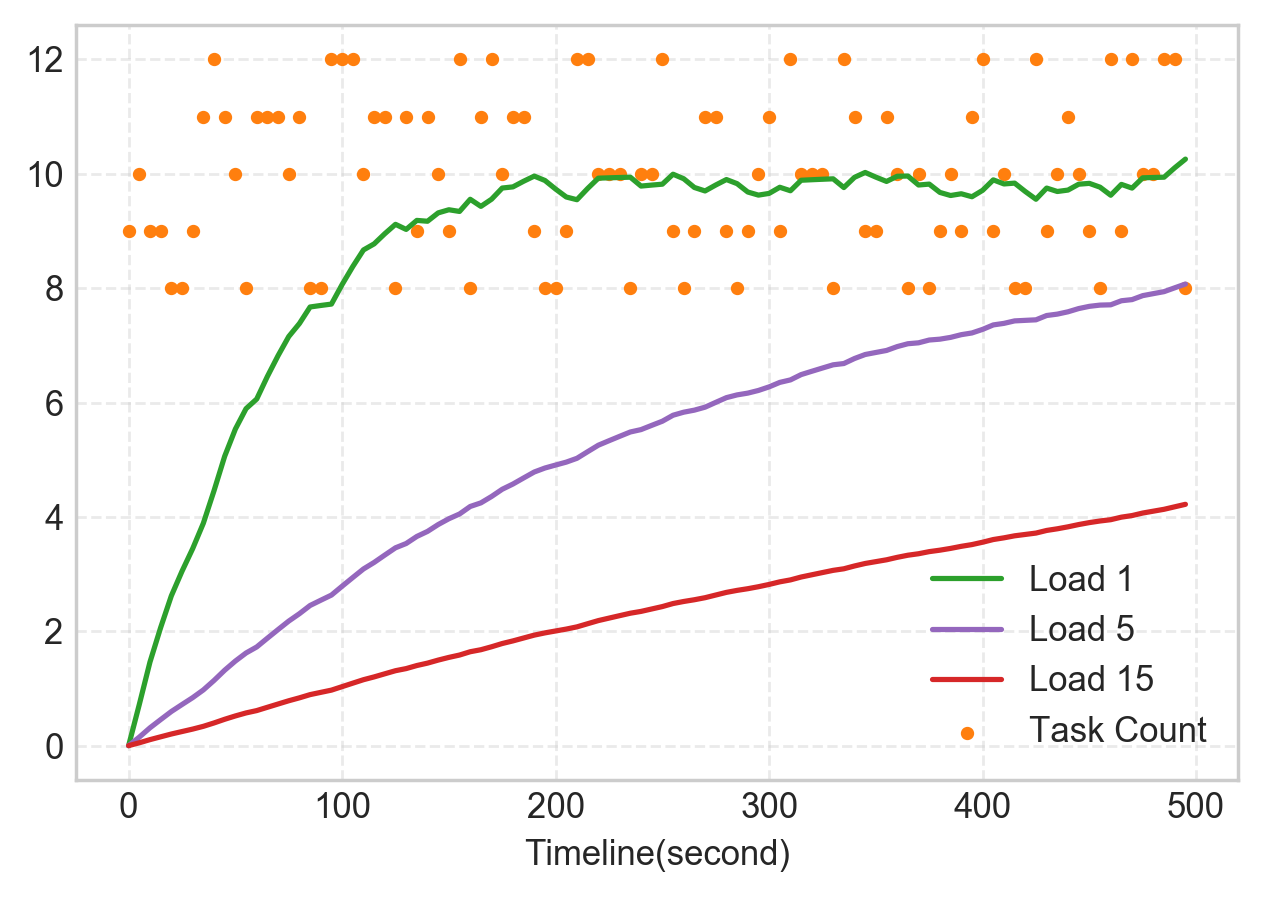

In [2]:
plot_task_count_and_load(task_count=randint(8, 13, 100))

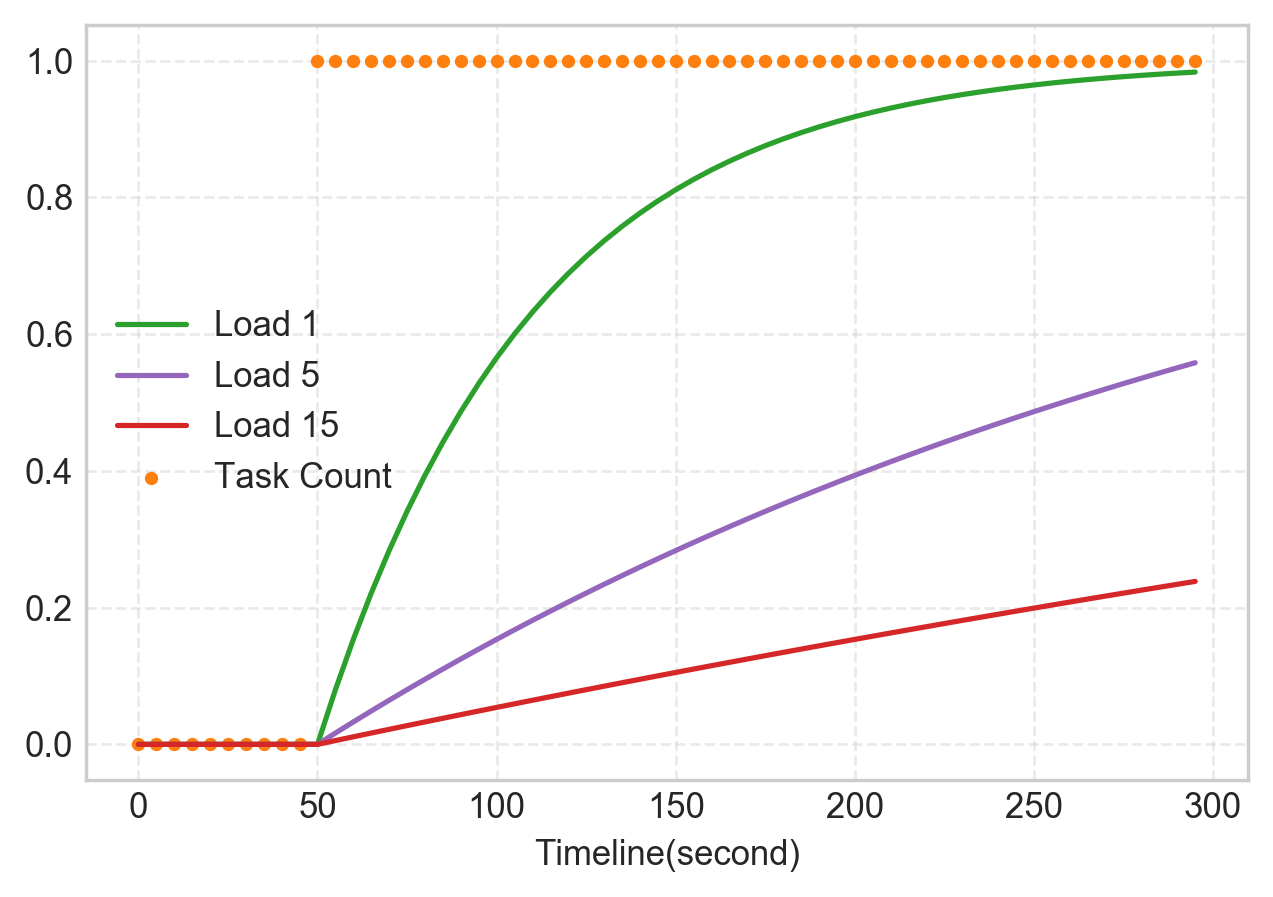

In [3]:
plot_task_count_and_load(task_count=np.append(np.zeros(10), np.ones(50)))

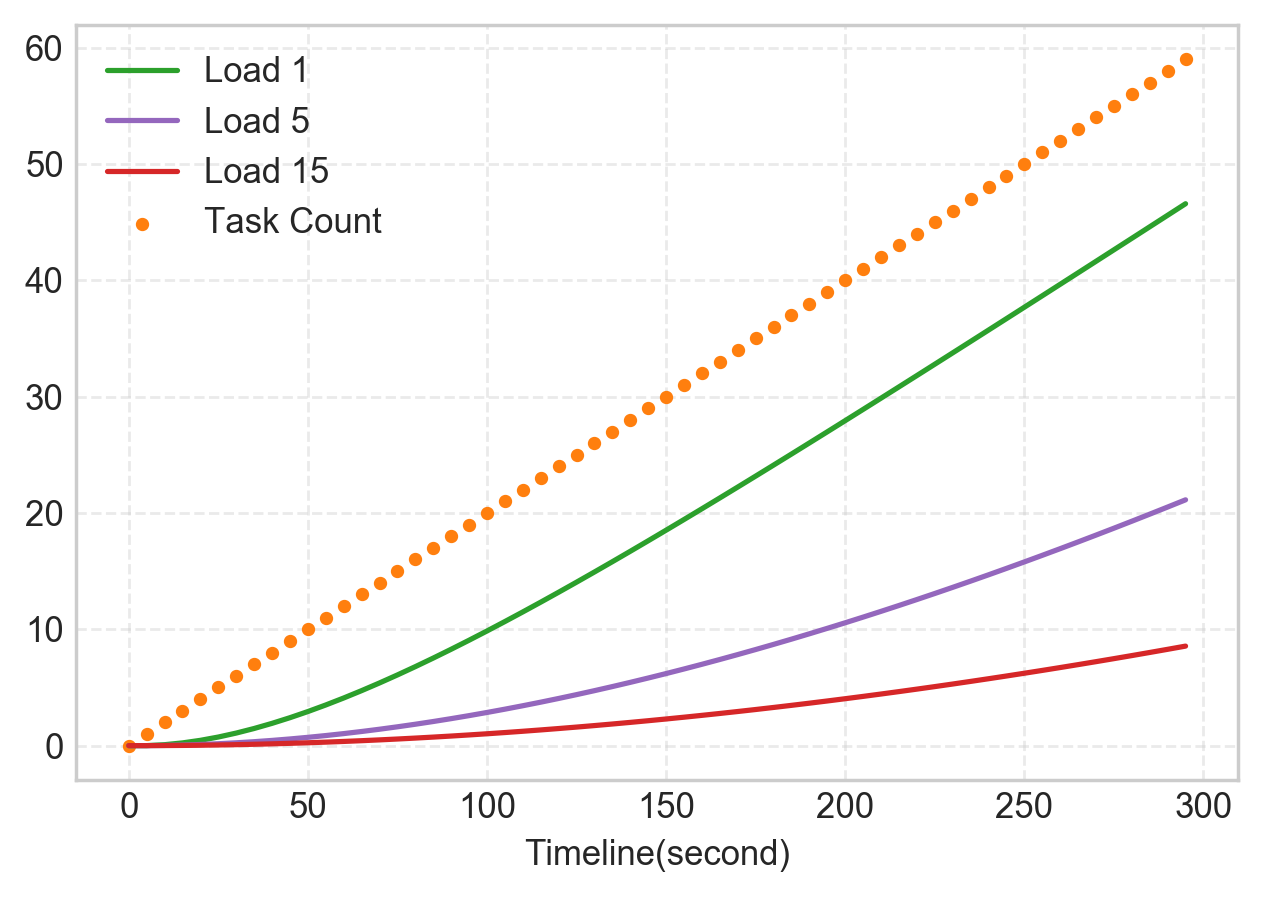

In [4]:
plot_task_count_and_load(task_count=np.arange(60))